In [69]:
df = read.csv("fairdraws.csv")

In [70]:
head(df)

,model,run_id,scenario,unit,year,value
,<chr>,<int>,<chr>,<chr>,<int>,<dbl>
1,IMAGE,0,ssp126,K,2001,0.8577782
2,IMAGE,0,ssp126,K,2002,0.8970256
3,IMAGE,0,ssp126,K,2003,0.9228464
4,IMAGE,0,ssp126,K,2004,0.9424717
5,IMAGE,0,ssp126,K,2005,0.9580960
6,IMAGE,0,ssp126,K,2006,0.9680752


In [71]:
unique(df$scenario)

[1] "ssp126" "ssp370"

In [72]:
subset(df, year == 2100)

,model,run_id,scenario,unit,year,value
,<chr>,<int>,<chr>,<chr>,<int>,<dbl>
100,IMAGE,0,ssp126,K,2100,1.494871
200,IMAGE,1,ssp126,K,2100,1.218888
300,IMAGE,2,ssp126,K,2100,1.006877
400,IMAGE,3,ssp126,K,2100,2.287981
500,IMAGE,4,ssp126,K,2100,1.678981
600,IMAGE,5,ssp126,K,2100,2.258195
700,IMAGE,6,ssp126,K,2100,1.170360
800,IMAGE,7,ssp126,K,2100,1.759118
900,IMAGE,8,ssp126,K,2100,1.386804


In [73]:
head(df)

,model,run_id,scenario,unit,year,value
,<chr>,<int>,<chr>,<chr>,<int>,<dbl>
1,IMAGE,0,ssp126,K,2001,0.8577782
2,IMAGE,0,ssp126,K,2002,0.8970256
3,IMAGE,0,ssp126,K,2003,0.9228464
4,IMAGE,0,ssp126,K,2004,0.9424717
5,IMAGE,0,ssp126,K,2005,0.9580960
6,IMAGE,0,ssp126,K,2006,0.9680752


Q: How hot will it be in 2050?

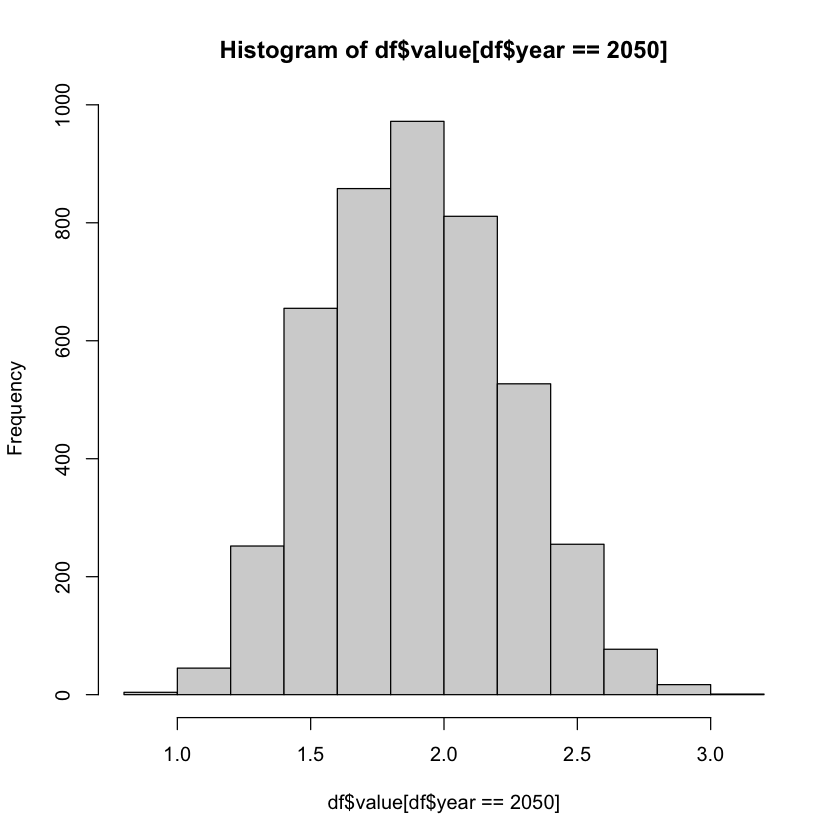

In [77]:
hist(df$value[df$year == 2050])

In [78]:
mean(df$value[df$year == 2050])

[1] 1.894143

Q: What's the 90th quantile of how hot it might be in 2050?

In [79]:
quantile(df$value[df$year == 2050], .9)

90% 
2.357932

In [80]:
df2 = subset(df, year == 2050 & run_id < 100)

In [81]:
df2 = df[df$year == 2050 & df$run_id < 100,]

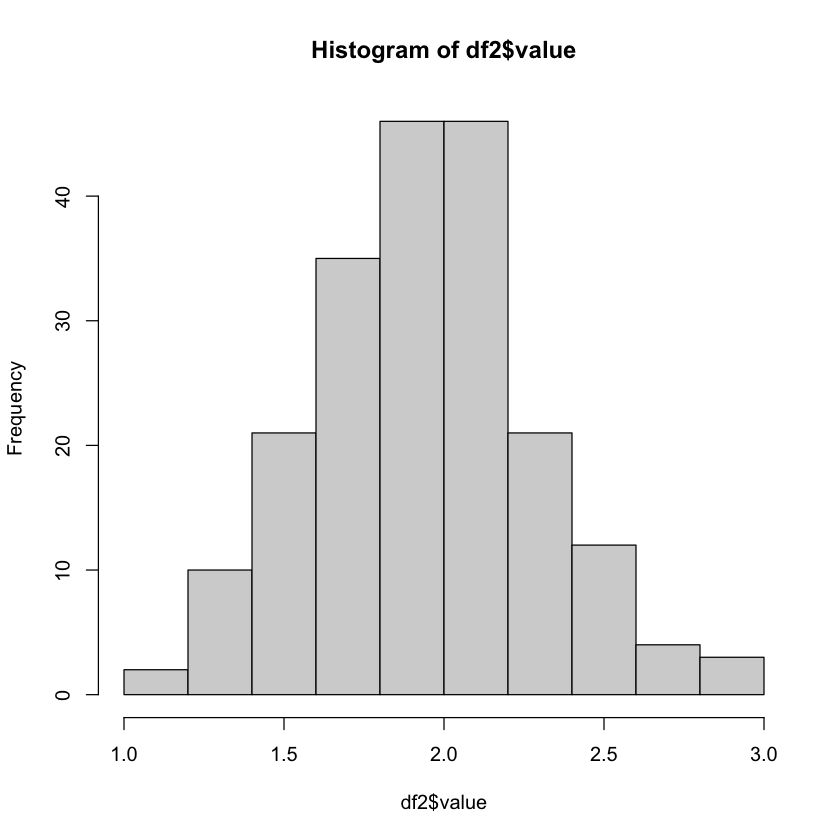

In [82]:
plot(hist(df2$value))

In [83]:
mod = lm(value ~ scenario + factor(run_id), data=df2)

In [84]:
summary(mod)


Call:
lm(formula = value ~ scenario + factor(run_id), data = df2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.20983 -0.04068  0.00000  0.04068  0.20983 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.722981   0.073094  23.572  < 2e-16 ***
scenariossp370    0.348550   0.014546  23.962  < 2e-16 ***
factor(run_id)1  -0.347836   0.102857  -3.382 0.001032 ** 
factor(run_id)2  -0.578460   0.102857  -5.624 1.73e-07 ***
factor(run_id)3   0.229898   0.102857   2.235 0.027657 *  
factor(run_id)4  -0.102233   0.102857  -0.994 0.322680    
factor(run_id)5   0.232868   0.102857   2.264 0.025756 *  
factor(run_id)6  -0.469303   0.102857  -4.563 1.45e-05 ***
factor(run_id)7   0.121419   0.102857   1.180 0.240644    
factor(run_id)8  -0.139112   0.102857  -1.352 0.179305    
factor(run_id)9   0.346833   0.102857   3.372 0.001066 ** 
factor(run_id)10 -0.154435   0.102857  -1.501 0.136421    
factor(run_id)11  0.347829   0.102857   3.382 0

In [85]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
scenario,1,6.074344,6.0743436,574.15602,5.358506e-43
factor(run_id),99,16.241916,0.1640598,15.50717,6.927317e-34
Residuals,99,1.047381,0.0105796,NA,NA


In [86]:
anv = anova(lm(value ~ scenario + factor(run_id), data=df2))
anv[, 2] / sum(anv[, 2])

[1] 0.25999132 0.69517916 0.04482952

In [89]:
anv[, 2] / sum(anv[, 2])

[1] 0.25999132 0.69517916 0.04482952

In [90]:
vardf = data.frame()
for (yy in 2001:2100) {
    df2 = subset(df, year == yy & run_id < 100)
    anv = anova(lm(value ~ scenario + factor(run_id), data=df2))
    values = anv[, 2] / sum(anv[, 2])
    vardf = rbind(vardf, data.frame(year=yy, scenario=values[1], ecs=values[2], resid=values[3]))
}

Warning message in anova.lm(lm(value ~ scenario + factor(run_id), data = df2)):
“ANOVA F-tests on an essentially perfect fit are unreliable”
Warning message in anova.lm(lm(value ~ scenario + factor(run_id), data = df2)):
“ANOVA F-tests on an essentially perfect fit are unreliable”
Warning message in anova.lm(lm(value ~ scenario + factor(run_id), data = df2)):
“ANOVA F-tests on an essentially perfect fit are unreliable”
Warning message in anova.lm(lm(value ~ scenario + factor(run_id), data = df2)):
“ANOVA F-tests on an essentially perfect fit are unreliable”
Warning message in anova.lm(lm(value ~ scenario + factor(run_id), data = df2)):
“ANOVA F-tests on an essentially perfect fit are unreliable”
Warning message in anova.lm(lm(value ~ scenario + factor(run_id), data = df2)):
“ANOVA F-tests on an essentially perfect fit are unreliable”
Warning message in anova.lm(lm(value ~ scenario + factor(run_id), data = df2)):
“ANOVA F-tests on an essentially perfect fit are unreliable”
Warning messa

In [91]:
head(vardf)

,year,scenario,ecs,resid
,<int>,<dbl>,<dbl>,<dbl>
1,2001,2.327285e-32,1,1.098476e-29
2,2002,1.111624e-31,1,1.706907e-29
3,2003,6.881090e-32,1,1.358636e-29
4,2004,1.875332e-31,1,2.367670e-29
5,2005,4.779616e-33,1,8.426778e-30
6,2006,6.439860e-34,1,8.617254e-30


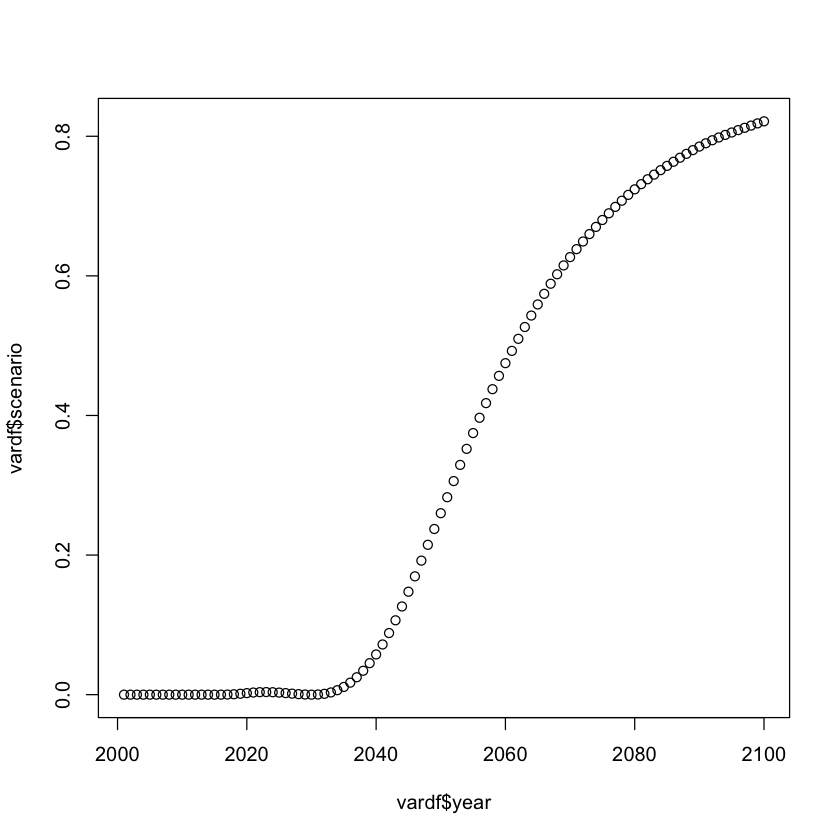

In [92]:
plot(vardf$year, vardf$scenario)

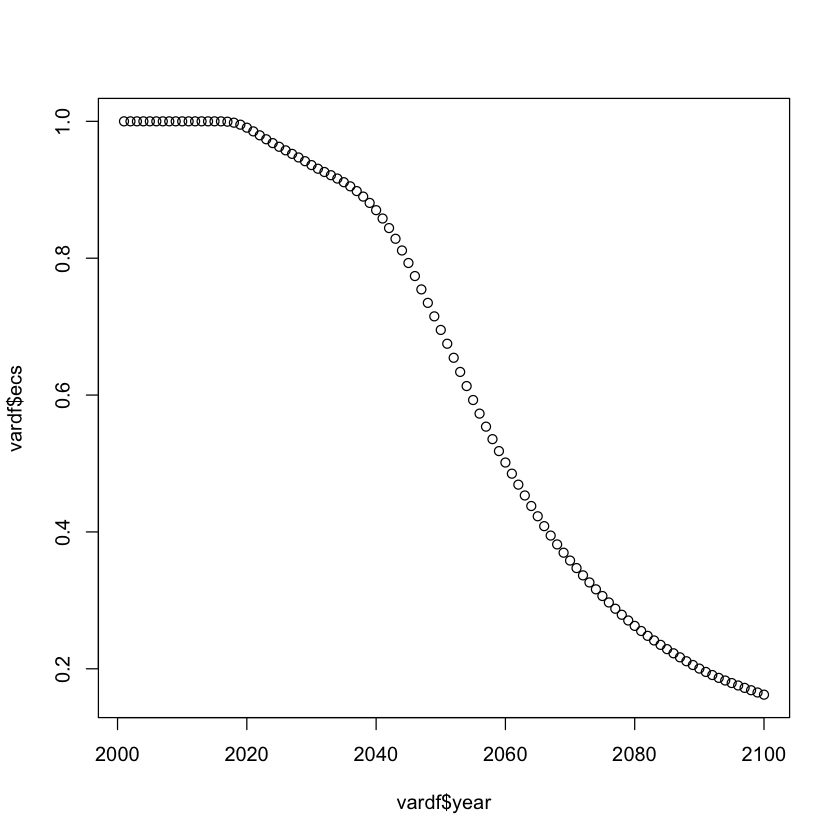

In [93]:
plot(vardf$year, vardf$ecs)